# Lorenz Equations

In [1]:
import numpy as np
import scipy.linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [2]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [3]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    #Set the attributes
    sig = 10
    ro = 28
    B = 8/3
    
    #create and return the equations
    eq1 = sig*(x[1]-x[0])
    eq2 = ro*x[0] - x[1] -x[0]*x[2]
    eq3 = x[0]*x[1] - B*x[2]
    return(eq1,eq2,eq3)
    pass

<IPython.core.display.Javascript object>


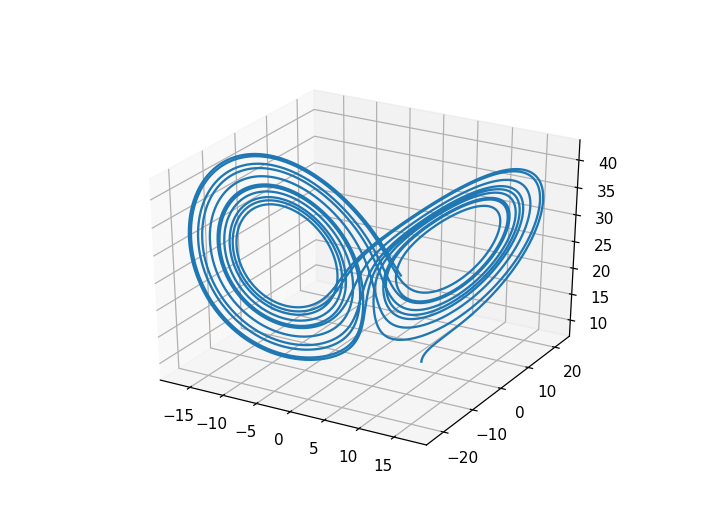

In [4]:
#creata y0 and get the solution
y0 = np.random.uniform(-15,15,3)
t = np.linspace(0,15,10000)
sol = odeint(lorenz,y0,t)

#Plot the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0],sol[:,1],sol[:,2])

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


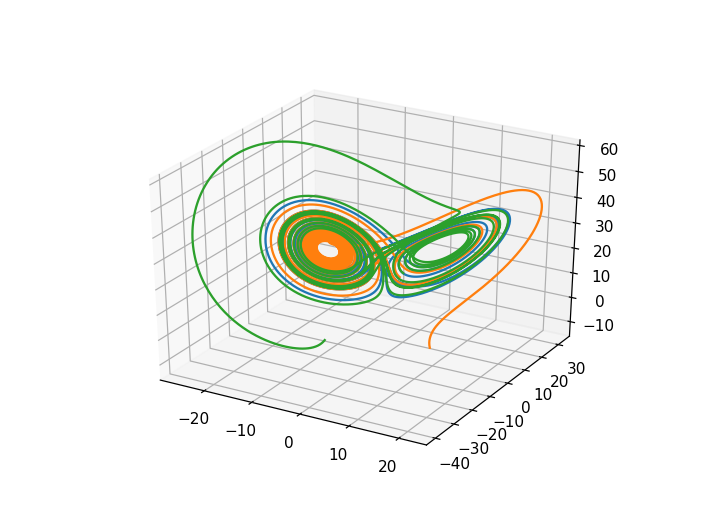

In [5]:
#Get three different y0 and calculate the solutions
my_sol = []
t = np.linspace(0,15,10000)
for i in range(3):
    y0 = np.random.uniform(-15,15,3)
    sol = odeint(lorenz,y0,t)
    my_sol.append(sol)

#Plot the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(my_sol[0][:,0],my_sol[0][:,1],my_sol[0][:,2])
ax.plot(my_sol[1][:,0],my_sol[1][:,1],my_sol[1][:,2])
ax.plot(my_sol[2][:,0],my_sol[2][:,1],my_sol[2][:,2])

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [8]:
#Use this specific video player
animation.writer = animation.writers['ffmpeg']                              
plt.ioff()

#Set the plot axes
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_ylim(-30,30)
ax.set_xlim(-30,30)                                                      
ax.set_zlim(-20,60)

#Get multiple solutions with y and a pertubation
my_sol = []
t = np.linspace(0,15,1000)
y0 = np.random.uniform(-15,15,3)
y0s =[]
y0s.append(y0)
y0s.append(y0+np.random.randn(3)*(1e-2))

#Get the solution
for y in y0s:
    sol = odeint(lorenz,y,t)
    my_sol.append(sol)

#Set up the particle and trajectories
og_particle, = plt.plot([],[],[],marker='o', color='r', label = 'Mercury')
og_traj, = plt.plot([],[],[], color='r',alpha=.5) 
pert_particle, = plt.plot([],[],[], marker='o', color='orange', label = 'Venus')
pert_traj, = plt.plot([],[],[], color='orange',alpha=.5)
og = my_sol[0]
pert = my_sol[1]

#Update function for the animation
def update(i):
    #Set the properties for the original y0
    og_particle.set_data(og[i,0],og[i,1])
    og_particle.set_3d_properties(og[i,2])
    og_traj.set_data(og[:i+1,0],og[:i+1,1])
    og_traj.set_3d_properties(og[:i+1,2])
    
    #Set the properties for the pertubated y0
    pert_particle.set_data(pert[i,0],pert[i,1])
    pert_particle.set_3d_properties(pert[i,2])
    pert_traj.set_data(pert[:i+1,0],pert[:i+1,1])
    pert_traj.set_3d_properties(pert[:i+1,2])

    #Return each of the particles and their trajectories
    return(og_particle, pert_particle,  
           og_traj, pert_traj)

#Save the animation
ani = animation.FuncAnimation(fig,update,frames=range(len(t)), interval=15)
ani.save('lorenz_animation1.mp4')

<video src='lorenz_animation1.mp4' controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [9]:
#Use this specific video player
animation.writer = animation.writers['ffmpeg']                              
plt.ioff()

#Set the plot and axes
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_ylim(-30,30)
ax.set_xlim(-30,30)                                                      
ax.set_zlim(-20,60)

#Get multiple solutions with the same y0 but different parameteres
my_sol = []
t = np.linspace(0,15,1000)
y0 = np.random.uniform(-15,15,3)
sol0 = odeint(lorenz,y,t,atol=1e-9,rtol=1e-7)
sol1 = odeint(lorenz,y,t,atol=1e-6,rtol=1e-4)

#Initialize the two different particles and trajectories
og_particle, = plt.plot([],[],[],marker='o', color='r', label = 'Mercury')
og_traj, = plt.plot([],[],[], color='r',alpha=.5) 
pert_particle, = plt.plot([],[],[], marker='o', color='orange', label = 'Venus')
pert_traj, = plt.plot([],[],[], color='orange',alpha=.5)
og = sol0
pert = sol1

#Update function for the animation
def update(i):
    #Set the first solution's attributes
    og_particle.set_data(og[i,0],og[i,1])
    og_particle.set_3d_properties(og[i,2])
    og_traj.set_data(og[:i+1,0],og[:i+1,1])
    og_traj.set_3d_properties(og[:i+1,2])
    
    #Set the second solution's attributes
    pert_particle.set_data(pert[i,0],pert[i,1])
    pert_particle.set_3d_properties(pert[i,2])
    pert_traj.set_data(pert[:i+1,0],pert[:i+1,1])
    pert_traj.set_3d_properties(pert[:i+1,2])

    #Return each of the particles and their trajectories
    return(og_particle, pert_particle,  
           og_traj, pert_traj)

#Save the animation
ani = animation.FuncAnimation(fig,update,frames=range(len(t)), interval=15)
ani.save('lorenz_animation2.mp4')

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


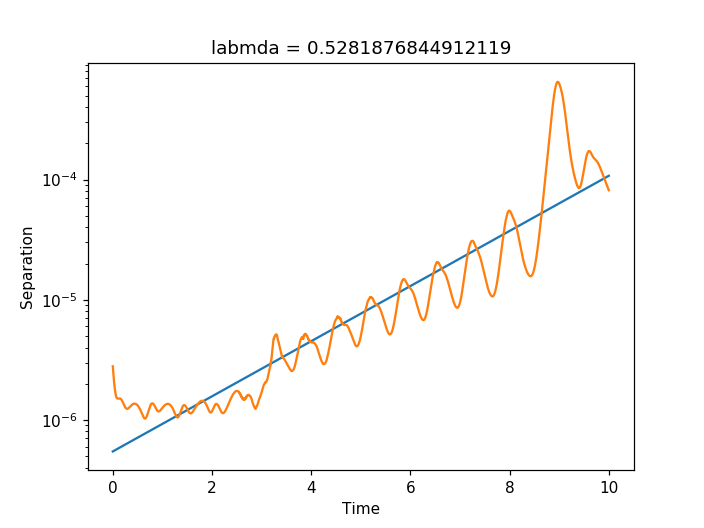

In [11]:
#Initialize the y0's and lists by creating a y0 from a solution of a random y0
y0s =[]
my_sol = []
y0 = np.random.uniform(-15,15,3)
t = np.linspace(0,10,10000)
sol = odeint(lorenz,y0,t)
y0 = sol[-1]

#Put in a y0 and a pertubation and get the new solutions
y0s.append(y0)
y0s.append(y0+np.random.randn(3)*(1e-6))
for y in y0s:
    sol = odeint(lorenz,y,t)
    my_sol.append(sol)

#Get the norms of the two solutions and get the values for the linear regression
normed = la.norm(my_sol[0]-my_sol[1],axis=1)
slope, intercept, r_value, p_value, std_err = linregress(t,np.log(normed))

#Plot the loss on a log-scaled graph
plt.semilogy(t,np.exp(slope*t+intercept))
plt.semilogy(t,normed)
plt.xlabel('Time')
plt.ylabel('Separation')
plt.title('labmda = ' + str(slope))
plt.show()